# Machine Learning Engineer Nanodegree
## Capstone Project
Jun Yan  
Jan 15, 2017

## I. Definition

### Project Overview
Lendingclub.com is one of the leading online p2p lending platforms, where lenders are matched directly to borrowers. Since its inception in 2007, the total amount of loan reaches almost 8 billion US dollars. There are two ways to invest on lendingclub.com: automatic investing and manual investing. In automatic investing, investors specify the amount of risk they are willing to take, and lendingclub automatically invest their money in a mixed portfolio constructed using their algorithms given the risk. For manual investing, investors can browse the notes and the borrowers' information, and select which notes and how much amount they would like to invest. Furthermore, investors don't necessarily have to browser all the notes, instead they can download those data, use their own algorithm to identify which borrowers to lend their money and process them in a batch fashion. Lendingclub provides historical loan information so that one can build machine learning algorithms to predict loan performances. This project aims at identifying loans that may default so that borrowers can avoid those loans using manual investing. 

There have been many similar efforts at predicting defaults using lendingclub data [1-7]. Although the goal of predicting default is the same, there are differences in feature selection, learning algorithms employed and metrics used for evaluating the model performance. In particular, some of the high performing models (for example, Ref [1-2]) incorrectly used fico scores that were produced after a loan is default, thus the results are highly misleading. Other analysis [3-7] select few features and ignore most of features available in the lendingclub dataset. The most comprehensive feature engineering effort comes from Ref. [8], however, they use a different dataset and their goal is to report whether a loan defaults and how much is the loss if a loan defaults. 

### Problem Statement
In this project, I propose to predict whether a borrower will default so that investors can avoid those borrowers using manual investing feature provided by lendingclub. This, however, does not necessarily lead to highest return on investment (ROI) because by completely avoiding potential defaults, one also avoid riskier loans that may lead to higher ROI even though they default at some point in the future. In order to maximize ROI, one needs to optimize ROI instead. In this project, we work on the simpler problem, that is to predict loan defaults.

Predicting loan defaults is a binary classification problem: a borrower either default at some time during the loan term or finish payment. In reality, the majority of lendingclub loans are between default and full payment, that is, these loans are on-going. Since investors can only invest in lendingclub notes at initial stage, which means investor can not jump into on-going loans, those on-going loans are irrelevant to our discussion. A binary classification problem is a classic machine learning problem with multiple machine learning algorithms to choose from, has quantitative metrics, such as accuracy, precision, f1 score, etc. to measure the results, and is replicable with the same data and machine learning model.


### Metrics
The machine learning task here is an imbalanced two-classed classification, with loan default represents around 20% of all data. Typically f1-score is used for imbalanced classification, however I found that there are two very different f1-scores, depends on which class one is predicting. Instead here I choose area under curve (AUC) as metrics to evaluate learning performance. According to Ref. [9], AUC is a common evaluation metric for binary classification problems. Consider a plot of the true positive rate vs the false positive rate as the threshold value for classifying an item as 0 or is increased from 0 to 1: if the classifier is very good, the true positive rate will increase quickly and the area under the curve will be close to 1. If the classifier is no better than random guessing, the true positive rate will increase linearly with the false positive rate and the area under the curve will be around 0.5. One characteristic of the AUC is that it is independent of the fraction of the test population which is class 0 or class 1: this makes the AUC useful for evaluating the performance of classifiers on unbalanced data sets.

## II. Analysis

### Data Exploration
The dataset comes from lendingclub website `DOWNLOAD LOAN DATA` section: https://www.lendingclub.com/info/download-data.action. According to the website, these files contain complete loan data for all loans issued from 2007 through 2016 Q3. In the following, I will load the dataset and present basic information and statistics.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_rows = 200
pd.options.display.max_columns = 200

random_state = 46

In [2]:
# load data
RawData = pd.read_csv('data/LoanStats3a_securev1.csv', header=1)
for f in (['data/LoanStats3b_securev1.csv', 'data/LoanStats3c_securev1.csv', 'data/LoanStats3d_securev1.csv', 
             'data/LoanStats_securev1_2016Q1.csv', 'data/LoanStats_securev1_2016Q2.csv', 
              'data/LoanStats_securev1_2016Q3.csv']):
    tmp = pd.read_csv(f, header=1, low_memory=False)
    RawData = RawData.append(tmp)

/Users/bdcoe/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (0,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print RawData.shape

(1218316, 115)


In [4]:
RawData.head(1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000,Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-1985,735,739,1,NaN,NaN,3,0,13648,83.7%,9,f,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-2015,171.62,NaN,Oct-2016,744,740,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN


#### Basic information
According to the above analysis, there are 1,218,316 rows and 115 columns in the loan dataset, with one loan example  shown in the cell above. The 115 columns include information such as borrowers' credit history (such as fico score), personal information (such as annual income, years of employment, zipcode, etc.), loan information (description, type, interest rate, grade, etc.), current loan status (Current, Late, Fully Paid, etc.) and latest credit and payment information. You can find the dictionary for the definitions of all data attributes [here](https://resources.lendingclub.com/LCDataDictionary.xlsx). Since there are too many columns, I will selectly explain a few most important columns/features in the following. 

#### Features 
Among those columns, I will use loan information, credit history, personal information as features, and discard columns related to latest credit and payment information. Features include but not limited to (partly shown for simplicity): 
 - `funded_amnt`: funded amount 
 - `term`: term of the loan (36 or 60 months)
 - `grade`: grade of the loan (A to G)
 - `int_rate`: interest rate
 - `emp_length`: employment length
 - `home_ownership`: own, mortgage, rent, or other
 - `annual_inc`: annual income
 - `dti`: debt to income ratio
 - `delinq_2yrs`: delinquency within last 2 years
 - `fico_range_low`: fico score, lower one
 - `fico_range_high`: fico score, higher one
 - `inq_last_6mths`: inquiry within last 6 months
 - `purpose`: purpose of the loan
 
These and related features have been widely used for default prediction [1-8]. There are three types of data in the dataset: numerical, categorical and text. I plan to use all types. Some numerical variables will be converted to categorical ones, and vice versa; text will be treated using bag-of-words representation.

#### Columns that shall not be used
In some of the previous work [1, 2], latest credit information such as `last_fico_range_low` and `last_fico_range_high` were used for prediction and lead to high model performance. However, these features are pulled recently according to the date specified in the `last_credit_pull_d` column. Thus the scores were obtained after a loan was fully paid or default, and their high predictive power is a false illusion because low fico score is the consequence of default but is not a predictor for default. As a result, I will exclude them from features. 

#### Columns that have lots of NULL values
In the following I show the percentage of NULL values for each column that has over 10% NULL data. The percentage data here is only for illustration only, because the actual number will change after data preprocessing detailed in Data Preprocessing section.

In [5]:
# percentage of NULL values for each column that has over 10% NULL values
countNull = RawData.isnull().sum() / len(RawData)
countNull[countNull > 0.1].sort_values(ascending=False)

dti_joint                         0.995765
annual_inc_joint                  0.995761
verification_status_joint         0.995761
desc                              0.896524
mths_since_last_record            0.836744
mths_since_recent_bc_dlq          0.760211
il_util                           0.750048
mths_since_last_major_derog       0.740079
mths_since_rcnt_il                0.718832
all_util                          0.710949
open_acc_6m                       0.710936
total_cu_tl                       0.710936
inq_last_12m                      0.710936
open_rv_12m                       0.710935
open_rv_24m                       0.710935
total_bal_il                      0.710935
open_il_24m                       0.710935
open_il_12m                       0.710935
open_il_6m                        0.710935
max_bal_bc                        0.710935
inq_fi                            0.710935
mths_since_recent_revol_delinq    0.663056
mths_since_last_delinq            0.501849
next_pymnt_

There are three types of columns that mainly consist of NULL values. The first type contains meaningful information such as column `dti_joint`, `annual_inc_joint` (if a borrower doesn't apply the loan jointly with someone else, these two column are NULL), and `mths_since_last_delinq` (months since last delinquency, so if a person has no such history, the column are NULL). The second type is truly missing information, for example, `desc` (description provided by borrowers), `open_acc_6m` and all other columns that has 71.0935% missing data (these are columns that were only recently populated thus missing in previous years). The third type is a mix of the first two types, for example, `mths_since_last_major_derog` is meaningful, yet carefully exam the data shows that the first 10% of loan data is missing. I will keep the first type but remove the second and the third type of columns from features. In the Data Preprocessing section I will provide details on which columns are kept and how to handle missing values for those columns.

#### Labels 
Column `loan_status` will be used as labels for classification task. I first examine the number of loans for each category. 

In [6]:
# count number of loans per loan_status category
grp = RawData.groupby('loan_status', as_index=False).count()[[0,1]]
grp.columns = ['loan_status', 'count']
grp

,loan_status,count
0,Charged Off,78609
1,Current,750682
2,Default,755
3,Does not meet the credit policy. Status:Charge...,761
4,Does not meet the credit policy. Status:Fully ...,1988
5,Fully Paid,337346
6,In Grace Period,8444
7,Issued,16049
8,Late (16-30 days),5176
9,Late (31-120 days),18491


There are 10 different loan status in the raw data. As I mentioned above that investors can only invest in the initial period and can't jump in on-going loans, I will remove all on-going loans (with status Current, Issued). For the rest of the status, status (Fully Paid, and Does not meet the credit policy. Status:Fully Paid) will be categorized as good loan, and status (Charged Off, Default, Does not meet the credit policy. Status:Charged Off, In Grace Period, Late) will be categorized as bad loan. In the following I will process the raw data so that there are only two categories left. 

In [7]:
# Retain only fulled paid, charged off and default loans for classification task
BinaryLoanData = RawData[ (RawData.loan_status == 'Charged Off')
        | (RawData.loan_status == 'Default')
        | (RawData.loan_status == 'Does not meet the credit policy. Status:Charged Off')
        | (RawData.loan_status == 'Does not meet the credit policy. Status:Fully Paid')
        | (RawData.loan_status == 'Fully Paid')]

def convert_loan_status_to_category(x):
    if x.loan_status == 'Fully Paid' or x.loan_status == 'Does not meet the credit policy. Status:Fully Paid':
        return 0
    else:
        return 1

# create a binary class as label for prediction
BinaryLoanData['binary_loan_status'] = BinaryLoanData.apply(convert_loan_status_to_category, axis=1)

/Users/bdcoe/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [8]:
# count number of loans for each class
grp = BinaryLoanData.groupby('binary_loan_status', as_index=False).count()[[0,1]]
grp.columns = ['binary_loan_status', 'count']
print grp['count'].sum()
grp

419459


,binary_loan_status,count
0,0,339334
1,1,80125


There are in total 419459 loans left, and they are quite imbalanced, with class 1 (default loan) represents around 20% of total data. In the Methodology section, I will deal with the imbalanced data using undersampling and oversampling techniques.

#### Statistics on numeric data

In [9]:
# statistics about numeric columns
grp = BinaryLoanData._get_numeric_data().describe().drop(['member_id', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 
    'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 
    'collection_recovery_fee', 'last_pymnt_amnt', 'last_fico_range_high', 'last_fico_range_low', 
    'collections_12_mths_ex_med', 'policy_code'], axis=1)
grp 

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,mths_since_last_major_derog,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,binary_loan_status
count,419459.000000,419459.000000,419459.000000,419459.000000,419455.000000,419459.000000,419430.000000,419459.000000,419459.000000,419430.000000,193702.000000,59486.000000,419430.000000,419430.000000,419459.000000,419430.000000,90672.000000,244.000000,244.00000,419430.000000,350860.000000,350860.000000,19561.000000,19561.000000,19561.000000,19561.000000,19080.000000,19561.000000,16960.000000,19561.000000,19561.000000,19561.000000,19561.000000,350860.000000,19561.000000,19561.000000,19561.000000,370215.000000,350848.000000,366514.000000,366270.000000,419314.000000,419430.000000,339802.000000,350859.000000,350859.000000,350860.000000,370215.000000,366840.000000,87149.000000,336590.000000,123359.000000,350860.000000,350860.000000,350860.000000,362009.000000,350860.000000,350860.000000,350860.000000,350860.000000,350860.000000,362009.000000,341768.000000,350860.000000,350860.000000,350860.000000,350768.000000,366396.000000,418094.000000,419354.000000,350860.000000,370215.000000,370215.000000,350860.000000,419459.000000
mean,13932.010280,13904.144684,13827.738524,427.147949,73680.744953,17.189658,0.273900,696.775215,700.775332,0.819405,34.780472,73.420754,11.213468,0.167654,15769.327772,25.306068,43.923493,115026.609918,17.99750,0.003989,206.004831,139415.703372,1.232350,2.787281,0.963397,1.991872,18.002463,36856.572108,73.802040,1.572210,3.266091,5759.939216,58.460794,30717.350812,1.153826,1.942999,2.609938,4.594085,13609.384959,8949.854778,63.001302,0.007648,10.070789,125.022422,178.392320,12.623872,7.763139,1.816979,23.370527,40.844072,6.560343,36.664605,0.453574,3.617944,5.601562,4.675914,8.758975,8.462925,8.227014,15.288753,5.573300,11.447166,0.000778,0.003035,0.082742,2.157319,94.778768,49.160904,0.116809,0.030561,169431.299410,46485.698040,20212.645873,38640.474828,0.191020
std,8288.005313,8273.613615,8296.631202,248.604677,62483.073669,23.373579,0.792964,31.711090,31.711638,1.097627,21.890293,29.284442,5.077896,0.492376,20994.456939,11.877239,21.887705,46975.084289,7.60178,0.068260,15557.170251,153638.772003,1.341469,2.969510,1.162154,1.914503,24.302144,41835.235109,21.741018,1.674362,2.810130,5734.498659,21.104890,35187.798354,1.691736,3.249882,2.782429,3.038570,16375.566347,14016.150378,27.630425,0.100159,600.177775,51.106436,89.322087,15.260752,8.567286,2.163521,28.811632,22.367722,5.773451,22.252040,1.188576,2.128481,3.085436,2.733201,4.928854,7.206580,4.253441,8.022918,3.042774,5.109417,0.030204,0.058720,0.468585,1.766660,7.980122,35.260431,0.347889,0.279595,171360.617868,44009.143834,19942.902618,40181.918309,0.393105
min,500.000000,500.000000,0.000000,15.670000,0.000000,0.000000,0.000000,610.000000,614.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,17950.000000,3.12000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

Note that some columns are dropped from the above statistics. They are either columns that are not truly numeric (`member_id` and `policy_code`), or columns that relate to loan payments (for example `total_pymnt`, which is the total amount paid by borrowers). 

#### Columns with anomalies/outliers
It is apparent from the above statistics that there are anomalies/outliers in the dataset, for example, max of `annual_inc` (annual income) is over 8.9 million US dollars and is an order of magnitude than the number at 75 percentile. In the following cell, a list of all the columns that having max value 10 times bigger than the 75 percentage value is shown. 

In [10]:
# find out columns with outliers
outlier_cols = []
for i in range(grp.shape[1]):
    if grp.iloc[6,i] * 10 < grp.iloc[7,i]:
        outlier_cols.append(grp.columns[i])
grp[outlier_cols]

,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_il_6m,open_il_12m,mths_since_rcnt_il,total_bal_il,open_rv_12m,max_bal_bc,total_rev_hi_lim,inq_fi,total_cu_tl,avg_cur_bal,bc_open_to_buy,chargeoff_within_12_mths,delinq_amnt,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_accts_ever_120_pd,num_il_tl,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,binary_loan_status
count,419455.000000,419459.000000,419430.000000,419430.000000,419430.000000,419459.000000,419430.000000,350860.000000,350860.000000,19561.000000,19561.000000,19080.000000,19561.000000,19561.000000,19561.000000,350860.000000,19561.000000,19561.000000,350848.000000,366514.000000,419314.000000,419430.000000,350859.000000,350860.000000,370215.000000,366840.000000,350860.000000,350860.000000,341768.000000,350860.000000,350860.000000,418094.000000,419354.000000,350860.000000,370215.000000,370215.000000,350860.000000,419459.000000
mean,73680.744953,17.189658,0.273900,0.819405,0.167654,15769.327772,0.003989,206.004831,139415.703372,2.787281,0.963397,18.002463,36856.572108,1.572210,5759.939216,30717.350812,1.153826,1.942999,13609.384959,8949.854778,0.007648,10.070789,12.623872,7.763139,1.816979,23.370527,0.453574,8.462925,0.000778,0.003035,0.082742,0.116809,0.030561,169431.299410,46485.698040,20212.645873,38640.474828,0.191020
std,62483.073669,23.373579,0.792964,1.097627,0.492376,20994.456939,0.068260,15557.170251,153638.772003,2.969510,1.162154,24.302144,41835.235109,1.674362,5734.498659,35187.798354,1.691736,3.249882,16375.566347,14016.150378,0.100159,600.177775,15.260752,8.567286,2.163521,28.811632,1.188576,7.206580,0.030204,0.058720,0.468585,0.347889,0.279595,171360.617868,44009.143834,19942.902618,40181.918309,0.393105
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45000.000000,11.140000,0.000000,0.000000,0.000000,5970.000000,0.000000,0.000000,28812.750000,1.000000,0.000000,5.000000,10802.000000,0.000000,2130.000000,13500.000000,0.000000,0.000000,3069.000000,1192.000000,0.000000,0.000000,4.000000,3.000000,0.000000,6.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47147.750000,19978.000000,7300.000000,12875.000000,0.000000
50%,63000.000000,16.730000,0.000000,0.000000,0.000000,11118.000000,0.000000,0.000000,80944.500000,2.000000,1.000000,10.000000,25706.000000,1.000000,4285.000000,22800.000000,1.000000,1.000000,7556.000000,3901.000000,0.000000,0.000000,8.000000,5.000000,1.000000,13.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,110161.500000,35286.000000,14100.000000,29151.000000,0.000000
75%,89124.500000,22.720000,0.000000,1.000000,0.000000,19512.000000,0.000000,0.000000,209293.250000,3.000000,1.000000,19.000000,48562.000000,2.000000,7580.000000,38000.000000,2.000000,3.000000,19104.000000,10580.000000,0.000000,0.000000,15.000000,10.000000,3.000000,28.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,246674.250000,58581.000000,26300.000000,52300.000000,0.000000
max,8900060.000000,9999.000000,29.000000,33.000000,54.000000,2568995.000000,6.000000,9152545.000000,8000078.000000,31.000000,20.000000,309.000000,796104.000000,28.000000,135471.000000,9999999.000000,23.000000,44.000000,958084.000000,497445.000000,7.000000,76735.000000,372.000000,197.000000,34.000000,554.000000,30.000000,117.000000,6.000000,4.000000,24.000000,8.000000,53.000000,9999999.000000,2644442.000000,684000.000000,2101913.000000,1.000000


There are two types of anomalies here: the first type is outliers in columns such as `annual_inc` and `dti`, where the variables themselves are continuous numeric data and there are extreme large numbers in the dataset; the second type is not really anomality, they are simply columns that are mostly zero (for example because a person has no history of delinquency). These columns can either be kept as it is, or converted to binary or ordinal variables. For example, `delinq_2yrs` (number of delinquencies within last two years) is can be represented by whether a person has delinquency within 2 years or not. 

#### Non-numeric columns (categorical or text)

In [11]:
# find columns that are not numeric. Irrelevant columns are dropped.
BinaryLoanData.select_dtypes(include=['object']).drop(['id', 'issue_d', 'loan_status', 'pymnt_plan', 
    'url', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'initial_list_status'], axis=1).head(2)

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,desc,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,application_type,verification_status_joint
0,36 months,10.65%,B,B2,NaN,10+ years,RENT,Verified,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,Jan-1985,83.7%,INDIVIDUAL,NaN
1,60 months,15.27%,C,C4,Ryder,< 1 year,RENT,Source Verified,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,Apr-1999,9.4%,INDIVIDUAL,NaN


The rest of columns contain categorical variables, text data, and variables that are supposed to be numeric (for example `int_rate`): 
- ordinal categorical variables: `term`, `grade`, `sub_grade`, `emp_length`;
- simple categorical variables: `home_ownership`, `verification_status`, `application_type` which have only few categories;
- complex categorical variables: `zip_code`, `addr_state`. These type of categorical variables have too many categories thus are very sparse if one converts them using one-vs-all techniques. One might use economic data (such as average income) at each state and zip code instead;
- columns that should be converted to numeric variables: `int_rate`, `earliest_cr_line` (convert to number of years in credit history), `revol_util`;
- text: `emp_title`, `desc`, `purpose`, `title`;

The details on processing these columns can be found at Data Preprocessing section.

### Exploratory Visualization
In this section, I selectly visualize a few most important and representative features.
#### Representative numeric features
Fico score is one of the deciding factors for loan applications. Usually fico scores are gathered from the top three credit scoring agencies. In the lendingclub dataset, a min and max value of fico scores are present for each borrower. In the following figure, the histogram of `fico_range_low` (min value of the fico scores) and the relationship of `fico_range_low` and `fico_range_high` are shown.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125f45b10>]], dtype=object)

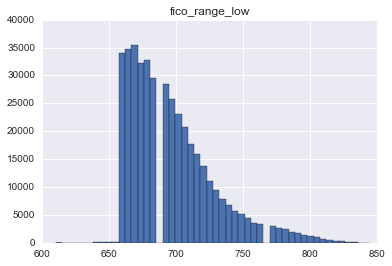

In [12]:
# Histogram of fico_range_low in 50 bins
# x-axis: fico_range_low
# y-axis: number of borrowers
BinaryLoanData.hist('fico_range_low', bins=50)

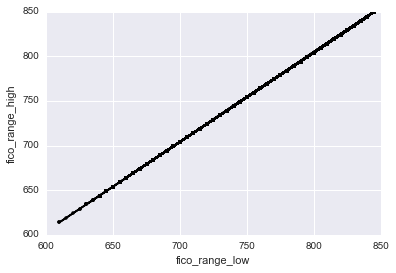

In [13]:
# Relationship between fico_range_low and fico_range_high
# x-axis: fico_range_low
# y-axis: fico_range_high
plt.plot(BinaryLoanData.fico_range_low, BinaryLoanData.fico_range_high, '.-k')
plt.xlabel('fico_range_low')
plt.ylabel('fico_range_high')

Its not surprising that lendingclub only approves application with fico score over 600 and the majority of applications having fico score over 650. Further exam of the data (didn't show here) indicates that loans with fico score between 600 and 650 are the one with `loan_status` "Does not meet the credit policy" but nevertheless issued. Thus `fico_range_low` has a right screwed distribution. There's a linear relationship between `fico_range_low` and `fico_range_high`, thus only one of them is needed in classification task.

To check whether fico score is indeed useful for the classification task, the following figure shows the boxplot of fico score comparing the binary loan status.

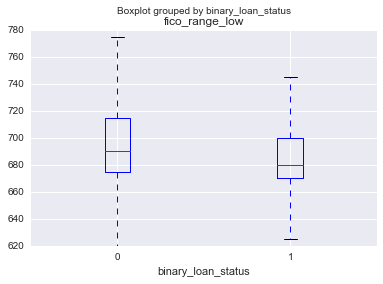

In [14]:
# Boxplot of fico_range_low comparing two binary_loan_status
# x-axis: binary_loan_status
# y-axis: fico_range_low
BinaryLoanData.boxplot(column='fico_range_low', by='binary_loan_status', showfliers=False)

According to the above boxplot, people who fully paid their loan (`binary_loan_status` == 0) has on average higher fico scores of around 690 than that from people who default (`binary_loan_status` == 1 and average fico score 680). Thus fico score is indeed a predicting factor of default. 

#### Representative categorical features
There are several categorical features that are useful for classification task, such as `term`, `home_ownership`, `grade`. In the following figure I select `term` and `grade` as representative categorical features to show that they have predicting power of loan default.

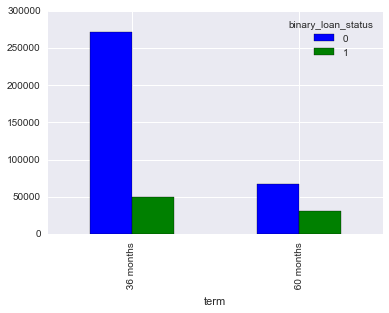

In [15]:
# Barplot of binary_loan_status comparing two different terms 
# x-axis: loan term - either 36 months or 60 months
# y-axis: number of borrowers in each binary_loan_status and term category
BinaryLoanData.groupby(['term', 'binary_loan_status']).size().unstack().plot(kind='bar', stacked=False)

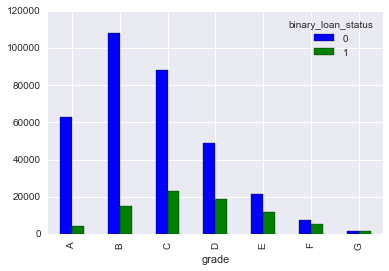

In [16]:
# Barplot of binary_loan_status comparing sever different grades from A to G
# x-axis: loan grade - from A to G
# y-axis: number of borrowers in each binary_loan_status and grade category
BinaryLoanData.groupby(['grade', 'binary_loan_status']).size().unstack().plot(kind='bar', stacked=False)

The above two barplots show that term and grade have predicting power over who default. The ratio of default is higher for loan term 60 months than 36 months; and the ratio of default increases with higher grade. 

#### Time series 
The loan dataset is also a time series with loan initiated different months and years. Here I plot the average loan default rate as a funcition of loan issued date (once per month).

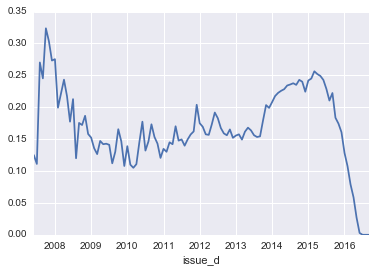

In [182]:
# Average loan default rate as a function of issue_d
# x-axis: issue date
# y-axis: average loan default rate
BinaryLoanData.groupby('issue_d').agg(np.mean).binary_loan_status.plot()

The above plot shows that the default rate is high around 2008, and gradually decreases and has less fluctuations from 2009 to mid-2013, and increases after 2014. The reason for the high loan default rate around 2008 is due to financial crisis. The reason for high loan default rate after 2014 is: a typical loan lasts 3 to 5 years, for loans initiated after 2014 most of people are still paying (thus removed from the dataset) and people who already default is included in the dataset and over-represents the population. 


### Algorithms and Techniques
The loan dataset is a time-series dataset with over 400,000 rows and imbalanced data (20% of data belongs to one class), has both numeric and categorical features.

#### Classification algorithms
There are many machine learning algorithms to perform classification. Since the current dataset is relatively large with over 400,000 rows, algorithms such as Support Vector Machine and K-nearest Neighbor will take too long to train and won't be used here. Here I intend to use Naive Bayes, Logistic Regression and Ensemble Methods (AdaBoost, Random Forest), all available in sklearn.
- Naive Bayes is a simple, fast for large dataset, yet powerful method. It assumes each feature is independent of each other; yet it can perform fairly well even when features are not independent such as in spam classification. It is served as a baseline algorithm for the classification task here. 
- Logistic Regression is another simple, fast yet powerful methods. Its a linear model and can not handle non-linear relationships between features. 
- Ensemble Methods combine the results of many base models (weak learners), can handle categorical variables and outliers very well, and can handle non-linear relationship between features. Although its relatively slower to train compared to Naive Bayes or Logistic Regression, the training time is still reasonable given the current dataset size. 

#### Under or over-sampling for imbalanced data
The loan dataset is imbalanced with 20% representing one class. I intend to use under or over-sampling techniques, and compare the modeling result with the one without sampling. 

#### Rolling cross valication on time-series data
With time-series data, if random or stratified cross-validation split is performed, we might end up predicting earlier loans using later loans, which is not reasonable. A better way is to perform rolling cross validation (forward chaining) according to Ref. [10], where set 1-6 are time-ordered data: 
- fold 1 : training [1], test [2]
- fold 2 : training [1 2], test [3]
- fold 3 : training [1 2 3], test [4]
- fold 4 : training [1 2 3 4], test [5]
- fold 5 : training [1 2 3 4 5], test [6]


### Benchmark
One baseline benchmark result is the one from random guessing or always predicting one class for all data:

In [201]:
from sklearn import metrics 

y_test = BinaryLoanData.binary_loan_status
np.random.seed(random_state)

y_predict = np.random.uniform(low=0, high=1, size=len(BinaryLoanData))
print 'AUC from random guessing :', metrics.roc_auc_score(y_test, y_predict)

y_predict = np.random.uniform(low=0.5, high=1, size=len(BinaryLoanData))
print 'AUC from always predicting default :', metrics.roc_auc_score(y_test, y_predict)


AUC from random guessing : 0.500215060303
AUC from always predicting default : 0.500495302301


As shown above, random guessing or always predicting one label give AUC slightly better than 0.5. 

There are also previous machine learning results using lendingclub loan data to compare with: 
- Ref [3]: AUC 0.698
- Ref [5]: AUC 0.732
- Ref [6]: AUC 0.713



## III. Methodology

### Data Preprocessing
In this section, all the data preprocessing steps are documented. 
#### Convert numeric variables to correct format 
`int_rate` and `revol_util` are supposedly numeric variables, however, it was loaded as if they are string since they have '%' in the data. Here I convert them into the correct numeric format. 

In [18]:
# Remove % from int_rate and revol_util and convert them to float number
BinaryLoanData.int_rate = BinaryLoanData.int_rate.str.replace('%', '').astype(float) / 100.
BinaryLoanData.revol_util = BinaryLoanData.revol_util.str.replace('%', '').astype(float) / 100.

/Users/bdcoe/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:2387: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


#### Convert datetime variable to usable numerical variable
`earliest_cr_line` is a datetime variable indicating the earliest credit line a borrower has. Here I convert it to number of years with credit history `cr_num_years`.

In [136]:
# convert earliest_cr_line to number of years of credit history cr_num_years
from datetime import datetime
def get_cr_num_years(x):
    return x.issue_d.year - x.earliest_cr_line.year

BinaryLoanData.issue_d = pd.to_datetime(BinaryLoanData.issue_d)
BinaryLoanData.earliest_cr_line = pd.to_datetime(BinaryLoanData.earliest_cr_line)
BinaryLoanData['cr_num_years'] = BinaryLoanData.apply(get_cr_num_years, axis=1)

/Users/bdcoe/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


#### Convert ordinal variables to numeric variables
`term`, `grade` and `subgrade` are ordinal variables and are simply converted to ordered numeric values. Instead of over-writting the existing data, I created new columns with old variable name appended with `_c` indicating that they are converted. 

In [20]:
# convert term, grade and sub_grade to nominal category variables with numeric data
def convert_term_to_category(x):
    if x == ' 36 months':
        return 0
    elif x == ' 60 months':
        return 1
    else:
        return 

# sort grade
grades = sorted(pd.unique(BinaryLoanData.grade))
def convert_grade_to_category(x):
    return grades.index(x)

# sort sub_grade
subgrades = sorted(pd.unique(BinaryLoanData.sub_grade))
def convert_subgrade_to_category(x):
    return subgrades.index(x)

# create new columns for these ordered numeric variables
BinaryLoanData['term_c'] = BinaryLoanData.term.apply(convert_term_to_category)
BinaryLoanData['grade_c'] = BinaryLoanData.grade.apply(convert_grade_to_category)
BinaryLoanData['sub_grade_c'] = BinaryLoanData.sub_grade.apply(convert_subgrade_to_category)


/Users/bdcoe/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/bdcoe/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/bdcoe/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable

#### Convert nominal variables to ordered numeric variables
`home_ownership` has multiple classes, however, according to the average binary loan status in each class shown in the next cell, class MORTGAGE, NONE has relatively lower default rate, class OWN has intermediate default rate, and class RENT and OTHER have higher default rate. Here I group them into ordered numeric values and store the data in a new column `home_ownership_c`. Note, class ANY has too few data points so I group them together with class MORTGAGE and NONE. 

In [21]:
# Examine the available categories in home_ownership, and find out the average of binary_loan_status in each category
BinaryLoanData.groupby('home_ownership').agg(np.mean).binary_loan_status

home_ownership
ANY         0.000000
MORTGAGE    0.166703
NONE        0.166667
OTHER       0.212291
OWN         0.198244
RENT        0.218987
Name: binary_loan_status, dtype: float64

In [22]:
# convert home_ownership to ordinal category variable with numeric values
# Combine ANY, MORTGAGE, NONE into one class
def convert_home_ownership_to_category(x):
    if (x == 'RENT') or (x == 'OTHER'):
        return 2
    elif (x == 'OWN'):
        return 1
    else:
        return 0
    
BinaryLoanData['home_ownership_c'] = BinaryLoanData.home_ownership.apply(convert_home_ownership_to_category)

/Users/bdcoe/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


#### Combine similar classes in categorical variables and convert to numeric variables
`verification_status` has three classes, Not Verified, Source Verified and Verified. The last two classes are in fact the same class. They are combined and converted to numerical variable `verification_status_c`.

In [23]:
BinaryLoanData.groupby('verification_status').binary_loan_status.mean()

verification_status
Not Verified       0.145025
Source Verified    0.208214
Verified           0.217667
Name: binary_loan_status, dtype: float64

In [24]:
# convert verification_status to category variable
def convert_verification_status_to_category(x):
    if (x == 'Source Verified') or (x == 'Verified'):
        return 1
    else:
        return 0
BinaryLoanData['verification_status_c'] = \
   BinaryLoanData.verification_status.apply(convert_verification_status_to_category) 

/Users/bdcoe/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


#### Convert ordinal variables with missing data to numeric values
`emp_length` is an ordinal variable indicating length of employment ranging from not available/unemployed, less than 1 year, to a list of 1 to 9 years and 10+ years (see the next cell for a list of all classes). Among them, 1-9 years are simply converted to their corresponding numerical values; while '< 1 year', '10+ year' and 'n/a' have to be dealt separately. Here I convert '< 1 year' to 0.5, '10+ year' to 10. Since 'n/a' has an average higher rate of default (0.27 compared to around 0.19 for other classes), I create a dummy variable for 'n/a': `emp_length_isnull`.

In [25]:
# Get a list of all classes for emp_length, and get the average loan default rate for each class
BinaryLoanData.groupby('emp_length').agg(np.mean).binary_loan_status

emp_length
1 year       0.191891
10+ years    0.180178
2 years      0.185584
3 years      0.187893
4 years      0.186932
5 years      0.185352
6 years      0.192613
7 years      0.191391
8 years      0.195156
9 years      0.197072
< 1 year     0.200117
n/a          0.268698
Name: binary_loan_status, dtype: float64

In [26]:
# convert employee length to numeric values, and create a dummy variable for whether the borrower is employed
dummy_number = 999
def convert_emp_length_to_category(x):
    a = x.replace(' years', '').replace(' year', '')
    if a == 'n/a':
        return dummy_number
    elif a == '< 1':
        return 0.5
    elif a == '10+':
        return 10.0
    else:
        return float(a)

BinaryLoanData['emp_length_isnull'] = (BinaryLoanData.emp_length == 'n/a').astype(int)
BinaryLoanData['emp_length_c'] = BinaryLoanData.emp_length.apply(convert_emp_length_to_category)


/Users/bdcoe/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/bdcoe/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


#### Convert nominal variables using 1-vs-K method
`purpose` is a nominal variable with multi-classes indicating the purpose of the loan. The following cell shows the average default rate for each purpose class. Some of the classes have significantly lower default rate such as car and wedding (around 0.13) compared to others such as small_business (0.30). Although there are classes having similar default rate, here I choose not to combine them because there is no simple meaning for such combination. I will convert them using 1-vs-K method and create K number of variables, with K being the number of unique purpose.  

In [27]:
BinaryLoanData.groupby('purpose').agg(np.mean).binary_loan_status

purpose
car                   0.129619
credit_card           0.163493
debt_consolidation    0.201184
educational           0.208038
home_improvement      0.164478
house                 0.186916
major_purchase        0.155348
medical               0.216939
moving                0.225153
other                 0.209307
renewable_energy      0.216802
small_business        0.296827
vacation              0.191849
wedding               0.127145
Name: binary_loan_status, dtype: float64

In [28]:
# convert purposes into one-of-K encoding
# one can also use sklearn oneHotEncoder, but it needs the data first to be transformed into numeric value, and
# then use OneHotEncoder, and has to rename the columns as well. 
purposes = pd.unique(BinaryLoanData.purpose)
for item in purposes:
    BinaryLoanData['purpose_%s'%(item)] = (BinaryLoanData.purpose == item).astype(int)

/Users/bdcoe/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


#### Create dummy variables for some columns with NULL values
`mths_since_last_record` and `mths_since_last_delinq` are numerical variables that have meaningful NULL values (if a borrow doesn't have public record or delinquency, these columns are NULL), and don't have systematic data missing in the earlier loans (details on how to get these columns are in the following subsections). Here I create dummy variables `mths_since_last_record_isnull` and `mths_since_last_delinq_isnull` to represent them, and fill the NULL values with a dummy number.

In [29]:
for col in ('mths_since_last_record', 'mths_since_last_delinq'):
    print '%30s, %5.2f, %5.2f'%(col, BinaryLoanData[BinaryLoanData[col].isnull()].binary_loan_status.mean(), \
                                     BinaryLoanData[BinaryLoanData[col].notnull()].binary_loan_status.mean() ) 
    BinaryLoanData[col+'_isnull'] = BinaryLoanData[col].isnull().astype(int)
BinaryLoanData['mths_since_last_record'] = BinaryLoanData.mths_since_last_record.fillna(dummy_number)
BinaryLoanData['mths_since_last_delinq'] = BinaryLoanData.mths_since_last_delinq.fillna(dummy_number)

        mths_since_last_record,  0.19,  0.21
        mths_since_last_delinq,  0.19,  0.20

/Users/bdcoe/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/bdcoe/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


/Users/bdcoe/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


`desc`, `title`, `emp_title` are text variables with NULL values, while `annual_inc_joint` is numerical variables with NULL values. According to the following cell, average default loan rates are different between borrows who provided those data and who do not. Here I convert each into a dummy variable representing whether that column is null or not. One can still use the text in `desc`, `title` and `emp_title` as features, as done in Ref. [1], but here I discard them for simplicity. 

In [30]:
for col in ('desc', 'title', 'emp_title', 'annual_inc_joint'):
    print '%30s, %5.2f, %5.2f'%(col, BinaryLoanData[BinaryLoanData[col].isnull()].binary_loan_status.mean(), \
                                     BinaryLoanData[BinaryLoanData[col].notnull()].binary_loan_status.mean() ) 
    BinaryLoanData[col+'_isnull'] = BinaryLoanData[col].isnull().astype(int)

                          desc,  0.20,  0.16
                         title,  0.10,  0.19
                     emp_title,  0.26,  0.19
              annual_inc_joint,  0.19,  0.09


/Users/bdcoe/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


#### List of columns to be dropped
This list includes 
- cols_irrelevant: irrelevant columns (such as `id`) and columns that shall not be used for classification (such as `total_pymnt`), see the comments in the following cell for details;
- cols_notused: columns that are not used in this study, but may be converted to econometric values in future study;
- cols_duplidated_info: columns that contain duplicated information in other columns;
- cols_converted: columns that are converted (for example, `term` is converted to `term_c`) so the original columns are not used instead the new columns are used; 

In [31]:
cols_irrelevant = ['id', 'member_id', 'policy_code', # id, member_id and policy code are meaningless
    'funded_amnt', 'funded_amnt_inv', # funded amount and funded amount for investors. With manual investing, 
                                      # one only gets information on loan_amnt, so these two columns are irrelevant
    'loan_status', # the original loan_status is converted to binary_loan_status column, so this one is not used        
    'pymnt_plan', 'url', 'initial_list_status', # payment plan, url of the loan, initial list status are irrelevant
    'out_prncp', 'out_prncp_inv', 'total_pymnt', # Remaining outstanding principle of the loan and the part for investor
                                                 # total payment are irrelevant for classification
    'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 
    # total payment to investors, total principle and interest received, late fees and recoveries fees are irrelevant 
    'collection_recovery_fee', 'next_pymnt_d', 'last_pymnt_amnt', 'last_pymnt_d', 
    # collections on recovery fee, next payment date, last payment amount and date are irrelevant
    'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low']
    # last date credit history was pulled and fico scores. These are the fico scores pulled recently in 2016
    # and shall not be used in classification.

# These columns are not used in this study, but might be converted to econometric values 
# such as average income in certain zip codes and states.
cols_notused = ['zip_code', 'addr_state', ]

# columns contain duplicated information
cols_duplicated_info = ['fico_range_high', # fico_range_high is linearly correlated with fico_range_low
                        'dti_joint', 'verification_status_joint', # same information as annual_inc_joint
                        'application_type' # same information as annual_inc_joint
                       ]

# these columns are converted to new columns and the original columns are thus dropped
cols_converted = ['term', 'grade', 'sub_grade', 'home_ownership', 'emp_length', 'mths_since_last_record',
                  'mths_since_last_delinq', 'desc', 'title', 'emp_title', 'purpose',
                  'annual_inc_joint', 'verification_status', 'earliest_cr_line']


#### Columns with systematic data missing in early loans
There are a number of columns that are not populated in early loan data. In the following cell, I found out these columns, and will drop the columns that have at least 10% data missing in early loans. 

In [32]:
# Remove columns that are not populated in the early loan data, 
# and columns that have high percentage of missing values
def percentage_initial_data_missing(x):
    c = 0
    for i in x:
        if pd.isnull(i):
            c += 1
        else:
            return float(c) / len(x)
    return float(c) / len(x)

# get list of columns with over 0.1% null values
countNull = BinaryLoanData.drop(cols_irrelevant + cols_notused + 
                cols_duplicated_info, axis=1).isnull().sum() / len(BinaryLoanData)
colNull = countNull[countNull > 0.001].index

# from these columns, get the columns that have at least 10% data thats not populated in early loans. 
cols_initial_data_missing = []
for col in colNull:
    p1 = percentage_initial_data_missing(BinaryLoanData[col])
    if  p1 > 0.1:
        cols_initial_data_missing.append(col)
        #print '%30s, %5.2f'%(col, p1)


#### Remove outliers and drop columns
In the Data Exploration section, I have identified that annual_inc, dti and revol_bal are numeric variables with outliers. It's unclear whether those extreme large values are reasonable values or something is wrong in the data (for example, typos). As a result,  I remove these outliers according to a quantile_threshold: all the data beyond 99.7 percentile for each column are removed. 

Columns to be dropped are a combined list of cols_irrelevant, cols_notused, cols_duplicated_info, cols_converted and cols_initial_data_missing. 

In [33]:
# Generate the final list for all the columns to be dropped
cols_todrop = cols_irrelevant + cols_notused + cols_duplicated_info + cols_converted + cols_initial_data_missing 

In [137]:
# Remove outliers for annual_inc, dti and revol_bal according to quantile_threshold. 
quantile_threshold = 0.997
ReducedLoanData = BinaryLoanData[(BinaryLoanData.annual_inc < BinaryLoanData.annual_inc.quantile(quantile_threshold))
    & (BinaryLoanData.dti < BinaryLoanData.dti.quantile(quantile_threshold))
    & (BinaryLoanData.revol_bal < BinaryLoanData.revol_bal.quantile(quantile_threshold))
    ].drop(cols_todrop, axis=1)

#### Convert some columns with outliers to ordinal variables
`delinq_2yrs`, `inq_last_6mths`, `pub_rec`, `delinq_amnt` and `tax_liens` have mainly zero values and a few large values which still seem reasonable so I don't throw these data away. Machine learning algorithms that are distance based such as support vector machine is very sensitive to large values. As a result I convert them to new ordinal variables according to a quantile_threshold: all zero data will be class 0, all data larger than 0 but smaller than 95 percentile of all non-zero data will be class 1, and the rest will be class 2. Depends on the machine learning algorithms, I will choose to use the original numeric variables if the algorithm is insensitive to outliers such as random forest, or the new ordinal variables if the algorithm is distance based. 

In [138]:
def convert_numeric_to_ordinal(x):
    if x == 0:
        return 0
    elif x > 0 and x <= q:
        return 1
    else:
        return 2
quantile_threshold2 = 0.95
for col in ('delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'delinq_amnt', 'tax_liens'):
    q = ReducedLoanData[ReducedLoanData[col] > 0][col].quantile(quantile_threshold2)
    #print col, q
    ReducedLoanData[col+'_c'] = ReducedLoanData[col].apply(convert_numeric_to_ordinal)

#### Remove some rows with systematic data missing
There are 25 rows having delinq_2yrs, earliest_cr_line, inq_last_6mths, open_acc, pub_rec, total_acc all missing. Here I remove these rows.

In [139]:
ReducedLoanData = ReducedLoanData[ReducedLoanData.delinq_2yrs.notnull()]

#### Fill NA values in some columns
revol_util column has a number of missing values. Since revol_util is highly correlated with revol_bal, I divide revol_bal into buckets of $10000 interval, and fill the missing revol_util with the average revol_util in the corresponding bucket of revol_bal. 

In [140]:
# infer missing revol_bal using the mean revol_bal of whom with revol_bal in the same bucket
# (using every $10000 as a bucket)
def revol_util_fillna(x):
    if pd.isnull(x.revol_util):
        if x.revol_bal == 0:
            return 0
        else:
            return ReducedLoanData[ReducedLoanData.revol_bal // 10000 == x.revol_bal // 10000].revol_util.mean()
    else:
        return x.revol_util
ReducedLoanData.revol_util = ReducedLoanData.apply(revol_util_fillna, axis=1)

For `collections_12_mths_ex_med`, `chargeoff_within_12_mths`, `pub_rec_bankruptcies` and `tax_liens`, the percentage of data missing is much less than 0.3%, and there is no clear way to infer this data from other columns, thus I simiply fill them with 0. 

In [141]:
print '%30s, %25s'%('col', 'percentage of data missing')
for col in ('collections_12_mths_ex_med', 
           'chargeoff_within_12_mths',  'pub_rec_bankruptcies', 'tax_liens'):
    print '%30s, %6.4f'%(col, ReducedLoanData[col].isnull().sum() / float(len(ReducedLoanData)))
    ReducedLoanData[col] = ReducedLoanData[col].fillna(0)

                           col, percentage of data missing
    collections_12_mths_ex_med, 0.0003
      chargeoff_within_12_mths, 0.0003
          pub_rec_bankruptcies, 0.0032
                     tax_liens, 0.0002


#### Feature transformation
Here I create two set of features: the first set `ScaledX` with outliers transformed to ordinal variables and features scaled so that they can be used to learning algorithms that are distance sensitive; the second set `OrgX` keeps these outliers without feature scaling and will be used for algorithms that are robust with outliers. 

In [226]:
from sklearn.preprocessing import StandardScaler

Y = ReducedLoanData.binary_loan_status.values

tmp = ReducedLoanData.drop(['binary_loan_status', 'issue_d', 'delinq_2yrs', 'inq_last_6mths', 
                                'pub_rec', 'delinq_amnt', 'tax_liens'], axis=1)
ScaledX = StandardScaler().fit_transform(tmp)

OrgX = ReducedLoanData.drop(['binary_loan_status', 'issue_d', 'delinq_2yrs_c', 'inq_last_6mths_c', 
                                'pub_rec_c', 'delinq_amnt_c', 'tax_liens_c', 
                            ], axis=1).values


### Implementation
The implementation process consists of 
1. spliting training and testing dataset using n-fold forward chaining 
2. resample the dataset so that there are equal number of class labels
3. perform machine learning and record training and testing scores

#### Implement resampling
A python library `imblearn` [http://contrib.scikit-learn.org/imbalanced-learn/index.html] is used for resampling of the loan data so the class label are more balanced. The simplest resampling methods are `RandomUnderSampler` and `RandomOverSampler`.

In [282]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler

def resampling(Xall, Yall, rus=None):
    # An example of resampler is : 
    # rus = RandomUnderSampler(random_state=random_state)
    # if rus is provided, perform resampling 
    if rus is not None:
        Xres, yres = rus.fit_sample(Xall, Yall)
    else: # otherwise, return original data
        Xres, yres = Xall, Yall
    return Xres, yres

#### Implement rolling cross-validation (n-fold forward chaining)
`sklearn` provides a function `TimeSeriesSplit` to perform train/test split using n-fold forward chaining. The following function `get_cv_score` takes all the features, labels, classifier, and resampler as input, resample the data, train the classifier, perform n-fold forward chaining cross-validation, and return the corresponding training and testing scores using the area under curve (auc) metric. 

In [283]:
from sklearn.model_selection import TimeSeriesSplit

def get_cv_score(Xall, Yall, clf, n_splits=5, rus=None):
    # ---- INPUT -----
    # Xall: features
    # Yall: class labels
    # clf: classifier object
    # rus: resampler object
    
    # create time series train/test split object
    tscv = TimeSeriesSplit(n_splits=n_splits)
    # initiate arrays to record training and testing scores.
    train_score = []
    test_score = []
    # loop over all train/test sets
    for train_index, test_index in tscv.split(Xall):
        # obtain train and test data
        X_train = Xall[train_index]
        X_test = Xall[test_index]
        y_train = Yall[train_index]
        y_test = Yall[test_index]
    
        # resample train and test set separately
        Xres_train, yres_train = resampling(X_train, y_train, rus)
        Xres_test, yres_test = resampling(X_test, y_test, rus)
        
        # train the classifier
        clf.fit(Xres_train, yres_train)
        
        # record train and test scores for each fold
        train_score.append(metrics.roc_auc_score(yres_train, clf.predict_proba(Xres_train)[:,1]))
        test_score.append(metrics.roc_auc_score(yres_test, clf.predict_proba(Xres_test)[:,1]))
    
    # return average score for all folds
    return np.mean(train_score), np.mean(test_score)

#### Perform training and report train/test scores
Here I chose three machine learning methods (Naive Bayes, Logistic Regression and Random Forest), justified in the Algorithms and Techniques section, to perform the classification. Default parameters for these methods are used. Refinement of the model will be reported in the Refinement section. I also chose three different resampling methods (None, random under sampling and random over sampling) to balence the dataset. Finally, 5-fold rolling cross-validation results are reported for both training and testing set for each classifier and resampler.

In [280]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

clf1 = GaussianNB()
clf2 = LogisticRegression(random_state=random_state)
clf3 = RandomForestClassifier(random_state=random_state)

rus1 = RandomUnderSampler(random_state=random_state)
rus2 = RandomOverSampler(random_state=random_state)

def get_class_name(a):
    return a.__class__.__name__

print '%25s, %25s : %15s, %15s'%('Classifier', 'Resampling', 'Training score', 'Cross-validation score')
for clf in ([clf1, clf2, clf3]):
    for rus in ([None, rus1, rus2]):
        auc = get_cv_score(ScaledX, Y, clf, 5, rus)
        print '%25s, %25s : %12.3f, %12.3f'%(get_class_name(clf), get_class_name(rus), auc[0], auc[1])

          Classifier,           Resampling :  Training error, Cross-validation error
          GaussianNB,             NoneType :        0.667,        0.663
          GaussianNB,   RandomUnderSampler :        0.667,        0.664
          GaussianNB,    RandomOverSampler :        0.666,        0.664
  LogisticRegression,             NoneType :        0.706,        0.703
  LogisticRegression,   RandomUnderSampler :        0.707,        0.703
  LogisticRegression,    RandomOverSampler :        0.707,        0.703
RandomForestClassifier,             NoneType :        0.999,        0.642
RandomForestClassifier,   RandomUnderSampler :        0.999,        0.652
RandomForestClassifier,    RandomOverSampler :        1.000,        0.646


With default parameters from `sklearn`, Logistic Regression performs the best, followed by Naive Bayes, and Random Forest performs the worst. The training and testing scores are similar using Naive Bayes and Logisitic Regression. On the other hand, for Random Forest, there's a large gap between training and testing score, meaning Random Forest siginficantly overfit, and model parameters shall be used to enhance the model performance. There's little difference among different resampling methods. 

### Refinement
In this section, you will need to discuss the process of improvement you made upon the algorithms and techniques you used in your implementation. For example, adjusting parameters for certain models to acquire improved solutions would fall under the refinement category. Your initial and final solutions should be reported, as well as any significant intermediate results as necessary. Questions to ask yourself when writing this section:
- _Has an initial solution been found and clearly reported?_
- _Is the process of improvement clearly documented, such as what techniques were used?_
- _Are intermediate and final solutions clearly reported as the process is improved?_


In [289]:
clf = GaussianNB()
print get_cv_score(ScaledX, Y, clf, 5, None)
print get_cv_score(OrgX, Y, clf, 5, None)

(0.66651945682342029, 0.66336997095406303)
(0.67657603453563409, 0.68273477849142505)


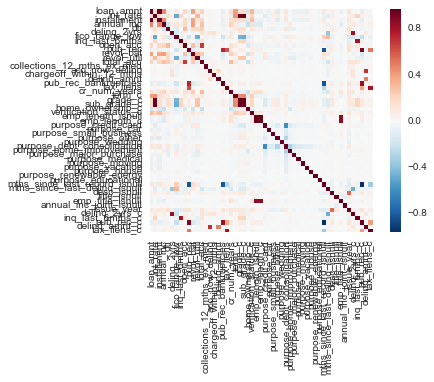

In [303]:
tmpX = ReducedLoanData.drop(['binary_loan_status', 'issue_d'], axis=1)
# Draw the heatmap using seaborn
sns.heatmap(tmpX.corr(), vmax=.8, square=True)


In [304]:
corrMat = tmpX.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,cr_num_years,term_c,grade_c,sub_grade_c,home_ownership_c,verification_status_c,emp_length_isnull,emp_length_c,purpose_credit_card,purpose_car,purpose_small_business,purpose_other,purpose_wedding,purpose_debt_consolidation,purpose_home_improvement,purpose_major_purchase,purpose_medical,purpose_moving,purpose_vacation,purpose_house,purpose_renewable_energy,purpose_educational,mths_since_last_record_isnull,mths_since_last_delinq_isnull,desc_isnull,title_isnull,emp_title_isnull,annual_inc_joint_isnull,issue_year,delinq_2yrs_c,inq_last_6mths_c,pub_rec_c,delinq_amnt_c,tax_liens_c
loan_amnt,1.000000,0.177606,0.954053,0.466537,0.049522,0.004759,0.090628,-0.014962,0.198630,-0.079708,0.396479,0.101636,0.225275,-0.007095,0.008446,0.004481,-0.002224,-0.102882,0.006342,0.171213,0.399425,0.178825,0.185730,-0.187625,0.315371,-0.075628,-0.073837,0.023611,-0.079783,0.019628,-0.129902,-0.032939,0.116351,-0.003356,-0.060029,-0.064464,-0.065005,-0.074162,0.010843,-0.014284,-0.028150,0.103206,0.009934,0.040477,0.009155,-0.063420,-0.019232,0.127618,0.013872,-0.016224,-0.095779,0.005526,0.004990
int_rate,0.177606,1.000000,0.170625,-0.067657,0.171103,0.073841,-0.493424,0.216389,0.016179,0.067142,-0.001352,0.306427,-0.032711,0.022313,0.028863,0.014284,0.007293,0.060035,0.024829,-0.091974,0.434573,0.948792,0.970148,0.077528,0.215162,0.002577,0.002824,-0.135851,-0.046868,0.059404,0.082824,0.004708,0.076045,-0.030225,-0.038067,0.026047,0.036805,0.015630,0.029077,0.007329,-0.011124,-0.068406,-0.111445,0.062477,0.005332,-0.001234,-0.006966,0.063525,0.084404,0.213266,0.072339,0.022998,0.030497
installment,0.954053,0.170625,1.000000,0.454301,0.048443,0.014642,0.037008,0.004849,0.190429,-0.069574,0.381469,0.127442,0.204738,-0.005195,0.010531,0.006782,-0.001412,-0.094869,0.011774,0.153730,0.160209,0.160376,0.166577,-0.157631,0.289242,-0.067768,-0.066172,0.023791,-0.082455,0.026829,-0.122155,-0.030020,0.114383,-0.012568,-0.062926,-0.062707,-0.061130,-0.071619,0.013254,-0.013406,-0.027333,0.092885,-0.004940,0.028210,0.007699,-0.052766,-0.016879,0.115836,0.024214,0.003283,-0.085550,0.007310,0.010650
annual_inc,0.466537,-0.067657,0.454301,1.000000,-0.210159,0.069905,0.105890,0.057613,0.198558,-0.022930,0.394217,0.045480,0.285088,0.002608,0.019476,0.021025,0.004820,-0.064358,0.043240,0.211886,0.098905,-0.052914,-0.053889,-0.232512,0.137633,-0.126612,-0.124975,-0.002168,-0.021168,0.032035,-0.030776,-0.008430,-0.021191,0.082978,0.000935,-0.005883,-0.013453,-0.012885,0.011304,-0.001934,-0.017602,0.048896,-0.080921,0.029656,0.000224,-0.094234,0.004073,0.072595,0.076795,0.043867,-0.039752,0.016000,0.046335
dti,0.049522,0.171103,0.048443,-0.210159,1.000000,-0.004385,-0.125562,-0.006613,0.308066,-0.038978,0.193339,0.202106,0.231862,0.002412,0.009974,-0.006770,-0.001678,-0.030632,-0.019680,0.050059,0.080208,0.161455,0.166201,0.000627,0.099984,0.032543,0.033335,0.020356,-0.054296,-0.063217,-0.042700,-0.029593,0.113486,-0.085727,-0.069945,-0.012211,-0.020565,-0.009933,-0.034436,-0.008904,-0.023479,0.041937,0.015787,0.080243,0.006672,0.005060,-0.015700,0.163240,-0.003698,0.000620,-0.038866,0.009454,-0.022471
delinq_2yrs,0.004759,0.073841,0.014642,0.069905,-0.004385,1.000000,-0.173345,0.021640,0.054640,-0.007841,-0.045610,-0.017846,0.125955,0.057123,0.121652,0.142434,0.029203,-0.031244,0.017982,0.092109,0.000048,0.075894,0.077541,-0.045580,0.016077,-0.011306,-0.010818,-0.022068,-0.006388,0.000189,0.005058,-0.003928,0.009962,0.014226,-0.001638,0.005160,0.002073,0.000048,0.002484,-0.002098,-0.003704,0.014648,-0.363230,0.048877,0.003280,-0.013644,-0.002013,0.069542,0.832282,0.019959,-0.012864,0.097698,0.022377
fico_range_low,0.090628,-0.493424,0.037008,0.105890,-0.125562,-0.173345,1.000000,-0.069437,-0.012130,-0.199250,0.019326,-0.475991

In [302]:
from sklearn.linear_model import LinearRegression 
x1 = np.array(tmpX.loan_amnt.tolist()).reshape(len(tmpX), 1)
y1 = np.array(tmpX.installment.tolist())
model = LinearRegression()
model.fit(x1, y1)
print y1 - model.predict(x1)


[  -8.77499043  -40.34109458  -12.98213874 ...,   22.88942616 -156.49924886
 -313.13218231]


In [176]:
# try some feature engineering
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = LogisticRegression(random_state=random_state)
clf2 = RandomForestClassifier(n_estimators=100, min_samples_split=20, class_weight='balanced', 
                              random_state=random_state)
clf3 = GaussianNB()

Y = ReducedLoanData.binary_loan_status

OrgX = ReducedLoanData.drop(['binary_loan_status', 'issue_d'], axis=1)
OrgX['log_annual_inc'] = OrgX.annual_inc.apply(np.log10)
OrgX['log_revol_bal'] = OrgX.revol_bal.apply(np.log10)
OrgX['log_revol_util'] = OrgX.revol_util.apply(np.log10)

OrgX = OrgX.drop(['annual_inc', 'revol_bal', 'revol_util', 'issue_year'], axis=1)

#OrgX['dti_log_annual_inc'] = OrgX.log_annual_inc * OrgX.dti
#OrgX['log_fico_range_low'] = OrgX.fico_range_low.apply(np.log10)
ScaledX = StandardScaler().fit_transform(OrgX)

eclf1 = VotingClassifier(estimators=[
         ('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')

print get_cv_score(ScaledX, Y, clf1)




TypeError: unsupported operand type(s) for +: 'int' and 'numpy.ufunc'

In [ ]:
XX
#X_train, X_test = OrgX[train_index], OrgX[test_index]
X_train, X_test = ScaledX[np.where(train_index.tolist())[0]], ScaledX[np.where(test_index.tolist())[0]]

y_train, y_test = Y[train_index], Y[test_index]
print len(y_train), len(y_test)


clf.fit(X_train, y_train)
print metrics.roc_auc_score(y_train, clf.predict_proba(X_train)[:,1])
print metrics.roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
#print metrics.roc_auc_score(y_test, np.ones(len(y_test)))
print metrics.confusion_matrix(y_test, clf.predict(X_test))

fpr, tpr, thresholds = metrics.roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, '-.k')

from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler
#rus = RandomUnderSampler()
rus = RandomOverSampler()

X_train_resampled, y_train_resampled = rus.fit_sample(X_train, y_train)
X_test_resampled, y_test_resampled = rus.fit_sample(X_test, y_test)

#clf.fit(X_train_resampled, y_train_resampled)
#print metrics.roc_auc_score(y_train_resampled, clf.predict_proba(X_train_resampled)[:,1])
#print metrics.roc_auc_score(y_test_resampled, clf.predict_proba(X_test_resampled)[:,1])
#print metrics.roc_auc_score(y_test, np.ones(len(y_test)))
#print metrics.confusion_matrix(y_test_resampled, clf.predict(X_test_resampled))

#fpr, tpr, thresholds = metrics.roc_curve(y_test_resampled, clf.predict_proba(X_test_resampled)[:,1])
#plt.plot(fpr, tpr, '-.k')



In [154]:
clf = RandomForestClassifier(n_estimators=50, min_samples_split=50, random_state=random_state)
print get_cv_score(ScaledX, Y, clf)

feature_importance = clf.feature_importances_
indices = np.argsort(feature_importance)[::-1]
unimportant_features = []
for i in indices:
    if feature_importance[i] > 0.01:
        print OrgX.columns[i], feature_importance[i]
    else:
        unimportant_features.append(OrgX.columns[i])


int_rate 0.104223489131
annual_inc 0.0820223992778
dti 0.0721159183042
revol_bal 0.0650239161466
revol_util 0.0645038622201
sub_grade_c 0.0632126222881
installment 0.0607201947525
loan_amnt 0.0503656899652
fico_range_low 0.0458052490576
total_acc 0.0446758576215
cr_num_years 0.0442851114689
open_acc 0.0359939445458
grade_c 0.035739484864
term_c 0.0320857026868
emp_length_c 0.026322243068
inq_last_6mths 0.0232256620291
issue_year 0.0159301892646
purpose_small_business 0.0106116600786
delinq_2yrs 0.010114047973


In [281]:
#sss = StratifiedShuffleSplit(n_splits=1, train_size=0.75, test_size=0.25, random_state=random_state)
#clf = RandomForestClassifier(n_estimators=50, min_samples_split=50, random_state=random_state)
#clf = GaussianNB()
#clf = DecisionTreeClassifier()
#clf = SVC(random_state=random_state) # slow for dataset over 10000 samples
#clf = LogisticRegression()
#clf = KNeighborsClassifier()
#clf = SGDClassifier(loss='log')
#clf = AdaBoostClassifier()


## IV. Results
_(approx. 2-3 pages)_

### Model Evaluation and Validation
In this section, the final model and any supporting qualities should be evaluated in detail. It should be clear how the final model was derived and why this model was chosen. In addition, some type of analysis should be used to validate the robustness of this model and its solution, such as manipulating the input data or environment to see how the model’s solution is affected (this is called sensitivity analysis). Questions to ask yourself when writing this section:
- _Is the final model reasonable and aligning with solution expectations? Are the final parameters of the model appropriate?_
- _Has the final model been tested with various inputs to evaluate whether the model generalizes well to unseen data?_
- _Is the model robust enough for the problem? Do small perturbations (changes) in training data or the input space greatly affect the results?_
- _Can results found from the model be trusted?_

### Justification
In this section, your model’s final solution and its results should be compared to the benchmark you established earlier in the project using some type of statistical analysis. You should also justify whether these results and the solution are significant enough to have solved the problem posed in the project. Questions to ask yourself when writing this section:
- _Are the final results found stronger than the benchmark result reported earlier?_
- _Have you thoroughly analyzed and discussed the final solution?_
- _Is the final solution significant enough to have solved the problem?_


## V. Conclusion
_(approx. 1-2 pages)_

### Free-Form Visualization
In this section, you will need to provide some form of visualization that emphasizes an important quality about the project. It is much more free-form, but should reasonably support a significant result or characteristic about the problem that you want to discuss. Questions to ask yourself when writing this section:
- _Have you visualized a relevant or important quality about the problem, dataset, input data, or results?_
- _Is the visualization thoroughly analyzed and discussed?_
- _If a plot is provided, are the axes, title, and datum clearly defined?_

### Reflection
In this section, you will summarize the entire end-to-end problem solution and discuss one or two particular aspects of the project you found interesting or difficult. You are expected to reflect on the project as a whole to show that you have a firm understanding of the entire process employed in your work. Questions to ask yourself when writing this section:
- _Have you thoroughly summarized the entire process you used for this project?_
- _Were there any interesting aspects of the project?_
- _Were there any difficult aspects of the project?_
- _Does the final model and solution fit your expectations for the problem, and should it be used in a general setting to solve these types of problems?_

### Improvement
In this section, you will need to provide discussion as to how one aspect of the implementation you designed could be improved. As an example, consider ways your implementation can be made more general, and what would need to be modified. You do not need to make this improvement, but the potential solutions resulting from these changes are considered and compared/contrasted to your current solution. Questions to ask yourself when writing this section:
- _Are there further improvements that could be made on the algorithms or techniques you used in this project?_
- _Were there algorithms or techniques you researched that you did not know how to implement, but would consider using if you knew how?_
- _If you used your final solution as the new benchmark, do you think an even better solution exists?_

-----------

**Before submitting, ask yourself. . .**

- Does the project report you’ve written follow a well-organized structure similar to that of the project template?
- Is each section (particularly **Analysis** and **Methodology**) written in a clear, concise and specific fashion? Are there any ambiguous terms or phrases that need clarification?
- Would the intended audience of your project be able to understand your analysis, methods, and results?
- Have you properly proof-read your project report to assure there are minimal grammatical and spelling mistakes?
- Are all the resources used for this project correctly cited and referenced?
- Is the code that implements your solution easily readable and properly commented?
- Does the code execute without error and produce results similar to those reported?


-----------

### References
1. http://cs229.stanford.edu/proj2015/199_report.pdf
2. http://blog.yhat.com/posts/machine-learning-for-predicting-bad-loans.html
3. https://rpubs.com/torourke97/190551
4. https://res.cloudinary.com/general-assembly-profiles/image/upload/v1416535475/uwumoooppttsmpgu1goo.pdf
5. http://www.wujiayu.me/assets/projects/loan-default-prediction-Jiayu-Wu.pdf
6. https://rstudio-pubs-static.s3.amazonaws.com/203258_d20c1a34bc094151a0a1e4f4180c5f6f.html
7. http://kldavenport.com/gradient-boosting-analysis-of-lendingclubs-data/
8. https://www.kaggle.com/c/loan-default-prediction
9. https://www.kaggle.com/wiki/AreaUnderCurve
10. http://stats.stackexchange.com/questions/14099/using-k-fold-cross-validation-for-time-series-model-selection